In [12]:
# !pip install annoy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import annoy
import pandas as pd
from collections import Counter

In [277]:
# %time from sklearn.neighbors import KNeighborsClassifier
# %time neigh = KNeighborsClassifier(n_neighbors=30)
# %time neigh.fit(full_embeddings, full_labels)
# # %time k_neighbors = neigh.kneighbors(single_test_vector['embeddings'].reshape(-1, embedding_size), return_distance=False)

Wall time: 0 ns
Wall time: 0 ns
Wall time: 51.1 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [2]:
%load_ext autoreload
%autoreload 2
from ann_utils import ANN

In [43]:
ann_v5 = ANN('embeddings_v5.npy', 'labels_v5.npy', -1)
ann_v5.supervised_evaluation()

classification acc: 60.0% 
top_2 classification acc: 83.0%


In [ ]:
ann_v5.plot_tsne(1000)

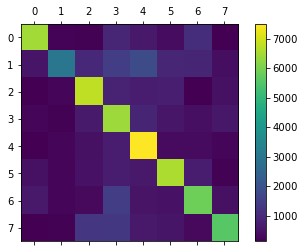

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(ann_v5.confusion_matrix)
fig.colorbar(cax)
plt.show()

C:\Users\BOUBAW\AppData\Local\Continuum\anaconda3\envs\dl4aed\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


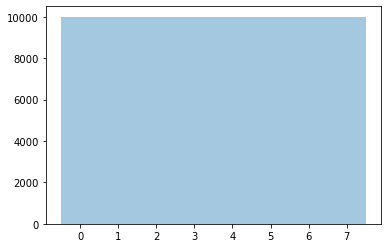

In [46]:
sns.distplot(ann_v5.labels,np.arange(ann_v5.labels.min(), ann_v5.labels.max()+2),kde=False,hist_kws={"align" : "left"})
plt.show()

In [49]:
print(ann_v5.classification_report)

               precision    recall  f1-score   support

      Hip-Hop       0.74      0.65      0.69      9970
          Pop       0.67      0.30      0.41     10000
         Folk       0.61      0.68      0.64     10000
 Experimental       0.46      0.64      0.54      9990
         Rock       0.57      0.75      0.65      9990
International       0.62      0.66      0.64     10000
   Electronic       0.60      0.59      0.59      9990
 Instrumental       0.69      0.56      0.62      9995

     accuracy                           0.60     79935
    macro avg       0.62      0.60      0.60     79935
 weighted avg       0.62      0.60      0.60     79935



In [ ]:
ann_v5.plot_tsne(100)

working on TSNE. Might take a while


In [3]:
ann_v5_02 = ANN('embeddings_v5 (2).npy', 'labels_v5 (2).npy', -1)
ann_v5_02.supervised_evaluation()

classification acc: 61.0% 
top_2 classification acc: 84.0%


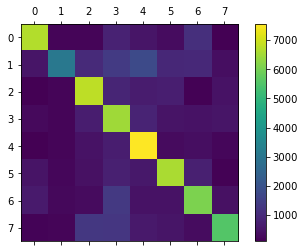

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(ann_v5_02.confusion_matrix)
fig.colorbar(cax)
plt.show()

In [5]:
print(ann_v5_02.classification_report)

               precision    recall  f1-score   support

      Hip-Hop       0.74      0.67      0.71      9970
          Pop       0.67      0.31      0.42     10000
         Folk       0.61      0.68      0.64     10000
 Experimental       0.48      0.65      0.55      9990
         Rock       0.58      0.76      0.66      9990
International       0.63      0.66      0.65     10000
   Electronic       0.60      0.61      0.60      9990
 Instrumental       0.71      0.56      0.62      9995

     accuracy                           0.61     79935
    macro avg       0.63      0.61      0.61     79935
 weighted avg       0.63      0.61      0.61     79935



In [8]:
filenames[:20]

array([b'datasets/fma_small_wav/000/000002.wav',
       b'datasets/fma_small_wav/000/000002.wav',
       b'datasets/fma_small_wav/000/000002.wav',
       b'datasets/fma_small_wav/000/000002.wav',
       b'datasets/fma_small_wav/000/000002.wav',
       b'datasets/fma_small_wav/000/000002.wav',
       b'datasets/fma_small_wav/000/000002.wav',
       b'datasets/fma_small_wav/000/000002.wav',
       b'datasets/fma_small_wav/000/000002.wav',
       b'datasets/fma_small_wav/000/000002.wav',
       b'datasets/fma_small_wav/000/000005.wav',
       b'datasets/fma_small_wav/000/000005.wav',
       b'datasets/fma_small_wav/000/000005.wav',
       b'datasets/fma_small_wav/000/000005.wav',
       b'datasets/fma_small_wav/000/000005.wav',
       b'datasets/fma_small_wav/000/000005.wav',
       b'datasets/fma_small_wav/000/000005.wav',
       b'datasets/fma_small_wav/000/000005.wav',
       b'datasets/fma_small_wav/000/000005.wav',
       b'datasets/fma_small_wav/000/000005.wav'], dtype=object)

In [9]:
embeddings = np.load('embeddings_v5 (2).npy', allow_pickle=True).squeeze()
labels = np.load('labels_v5 (2).npy', allow_pickle=True)
filenames = np.load('filenames.npy', allow_pickle=True)

In [25]:
sample_id = 55


sample_vec = embeddings[sample_id]
predictions = ann_v5_02.annoy_index.get_nns_by_vector(sample_vec, 10, include_distances=False)
np.array(Counter(filenames[predictions]).most_common())[:2,0], filenames[sample_id]

(array([b'datasets/fma_small_wav/110/110230.wav',
        b'datasets/fma_small_wav/000/000148.wav'], dtype='|S37'),
 b'datasets/fma_small_wav/000/000148.wav')

In [32]:
catch = list()

for sample_vec, filename in zip(embeddings, filenames):
    predictions = ann_v5_02.annoy_index.get_nns_by_vector(sample_vec, 10, include_distances=False)
    mc = np.array(Counter(filenames[predictions]).most_common())[:2,0]
    
    catch.append(filename in mc)

In [33]:
perc = (np.sum(catch)/len(catch)) * 100

In [35]:
print(f'top-2 song-matching: {np.round(perc, 2)}%')

top-2 song-matching: 93.02%


In [36]:
catch_single = list()

for sample_vec, filename in zip(embeddings, filenames):
    predictions = ann_v5_02.annoy_index.get_nns_by_vector(sample_vec, 10, include_distances=False)
    mc = np.array(Counter(filenames[predictions]).most_common())[:1,0]
    
    catch_single.append(filename == mc[0])

In [38]:
prec_single = (np.sum(catch_single)/len(catch_single)) * 100

print(f'top-1 song-matching: {np.round(prec_single, 2)}%')

top-1 song-matching: 76.16%


In [41]:
catch_three = list()

for sample_vec, filename in zip(embeddings, filenames):
    predictions = ann_v5_02.annoy_index.get_nns_by_vector(sample_vec, 10, include_distances=False)
    mc = np.array(Counter(filenames[predictions]).most_common())[:3,0]
    
    catch_three.append(filename in mc)

In [42]:
prec_three = (np.sum(catch_three)/len(catch_three)) * 100

print(f'top-3 song-matching: {np.round(prec_three, 2)}%')

top-3 song-matching: 98.91%
